<a href="https://colab.research.google.com/github/erodola/NumMeth-s2-2022/blob/main/esercizi/ex2/ex2_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benvenuti alla seconda esercitazione di Metodi Numerici! 

Oggi esploreremo il concetto di regressione e quello di gradiente

In [ ]:
!wget https://imagemagick.org/image/gradients/linear_gradient.png
!wget https://imagemagick.org/image/gradients/radial_gradient.png
!wget https://imagemagick.org/image/gradients/radial_gradient_ellipse_angle45.png
!wget https://happycoding.io/examples/processing/for-loops/images/corner-gradient-4.png
!wget https://assets.weforum.org/editor/3Vfo-4dlgdvyx-GzXP2Vam8pRqmca7-0vJBgA8hPt0M.png -O worldmap.png
!wget https://time.graphics/uploadedFiles/500/b5/a4/b5a4d7665e45a1d24c807635d24106f8.jpg -O building.jpg
!wget https://github.com/erodola/NumMeth-s2-2022/blob/main/esercizi/ex2/MountainTerrain.ply
!wget https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/esercizi/ex2/Mountain.ply

!pip install open3d
import os
os.kill(os.getpid(), 9)

--2022-04-12 19:52:45--  https://imagemagick.org/image/gradients/linear_gradient.png
Resolving imagemagick.org (imagemagick.org)... 44.234.227.205
Connecting to imagemagick.org (imagemagick.org)|44.234.227.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 891 [image/png]
Saving to: ‘linear_gradient.png’

linear_gradient.png 100%[===================>]     891  --.-KB/s    in 0s      

2022-04-12 19:52:45 (116 MB/s) - ‘linear_gradient.png’ saved [891/891]

--2022-04-12 19:52:45--  https://imagemagick.org/image/gradients/radial_gradient.png
Resolving imagemagick.org (imagemagick.org)... 44.234.227.205
Connecting to imagemagick.org (imagemagick.org)|44.234.227.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81379 (79K) [image/png]
Saving to: ‘radial_gradient.png’

radial_gradient.png 100%[===================>]  79.47K   483KB/s    in 0.2s    

2022-04-12 19:52:46 (483 KB/s) - ‘radial_gradient.png’ saved [81379/81379]

--2022-04-12 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import math
import plotly.graph_objects as go
import numpy as np
import open3d as o3d 
#import os 

%matplotlib inline

## Regressione lineare

Come possiamo calcolare una regressione lineare? Vediamo prima di tutto l'esempio con le funzioni disponibili in Python:

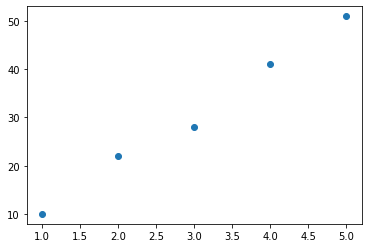

In [3]:
# Il tempo sarà il nostro asse delle X
mese = np.array([1, 2, 3, 4, 5])

# Il numero di panini mangiati dall'inizio dell'anno sarà il nostro asse delle y
panini = np.array([10, 22, 28, 41, 51])

plt.scatter(mese, panini)

Cerchiamo per i nostri punti una regola nella forma:
$ y = a x + b $.

Notiamo già ad occhio che non esiste una retta che passa da tutti i punti, quindi dovremo trovare una soluzione ai minimi quadrati.



In [4]:
# In numpy troviamo la funzione "polyfit". Questa funzione richiede come argomenti
# i valori delle X, i valori delle Y, e l'ordine del polinomio che vogliamo utilizzare 
# NB: ovviamente, la funzione assume che X e Y siano ordinate in modo coerente tra loro
retta = np.polyfit(mese, panini, 1)

# L'output ritornato sono i coefficienti dell'equazione della retta, ordinati per
# grado decrescente (prima il coefficiente angolare e poi l'intercetta)
print(retta)

[10.1  0.1]


Qual è la retta che abbiamo trovato? 
Stiamo cercando una retta della forma

$$panini = a + b_0*mese$$

Il metodo polyfit retituisce i coefficienti [$b_0$, $a$].


Avremo quindi:

$$panini = 0.1 + 10.1*mese$$

Per esempio, per il mese 1, avremmo:
$$panini = 0.1 + 10.1*1 = 10.2$$
Per il mese 4
$$panini = 0.1 + 10.1*4 = 40.5$$



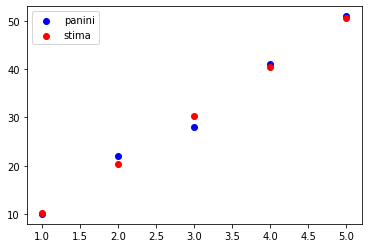

In [5]:
# la funzione numpy.polyval() chiede:
# i coefficienti del polinomio (retta)
# i punti in cui valutare il polinomio (mese).

# numpy.polyval restituisce una lista, con i valori
# per i punti specificati

panini_stimati_retta = np.polyval(retta, mese)

plt.scatter(mese, panini, c='b')
plt.scatter(mese, panini_stimati_retta, c='r')

plt.legend(('panini','stima'))

Ecco quindi che le nostre stime sembrano abbastanza accurate: proviamo a misurare l'errore ai minimi quadrati.

In [6]:
L = np.sum((panini - panini_stimati_retta)**2)
print(L)

9.099999999999993


Ora facciamo un po' di pratica con le forme matriciali. Sappiamo che il nostro problema può essere scritto come segue:

$\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n \end{bmatrix} = \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \dots & \dots \\ x_n & 1\end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} $

ovvero: 

$ \mathbf{y = X \theta} $

Risolvendo per $\theta$:

$ \mathbf{X^{-1} y = \theta} $



In [7]:
# Nel vettore y andranno i nostri valori sull'asse Y
y = panini

# Nella matrice X dobbiamo avere una colonna con i valori delle X, e una di tutti 1
X = np.concatenate((mese[:,np.newaxis], np.ones((mese.shape[0],1))),1)

# Calcoliamo l'inversa di X
X_inv = np.linalg.pinv(X)

# Risolviamo seguendo l'equazione:
retta_2 = X_inv @ y

In [8]:
print(retta_2)

[10.1  0.1]


In [9]:
# Valutiamo le y ottenute dai parametri:
print(X @ retta_2)

# Riportiamo anche i valori ottenuti con polyval
print(panini_stimati_retta)

[10.2 20.3 30.4 40.5 50.6]
[10.2 20.3 30.4 40.5 50.6]


Ora proviamo a risolverlo calcolandoci il gradiente dell'errore e ponendolo a zero. Ci ricordiamo che il gradiente vale 

$\nabla_{\mathbf{\Theta}} \|\mathbf{Y^T - X^T \theta} \|_F^2 = - 2 \mathbf{XY}^T + 2 \mathbf{XX}^T \theta$

Se lo risolviamo per $\theta$ e lo poniamo uguale a zero otteniamo:

$\mathbf{\theta} = (X^T X)^{-1} X^T y$


In [10]:
retta_3 = np.linalg.pinv(X.T @ X) @ X.T @ y

**Esercizio 1**: A lezione avete visto come sia possibile utilizzare questi metodi anche per effettuare regressione polinomiale, ovvero dati una serie di punti trovare l'equazione nella forma 

$y_i = b + \sum_{j=1}^k a_j x^j_i$

Provate a considerare i dati che seguono e a ottenere la parabola migliore, procedendo come segue:

1) cominciate risolvendo con la funzione polyfit; questo vi darà i coefficienti della vostra parabola

2) provate a risolvere scrivendo l'equazione del gradiente e ponendola a 0

3) sinceratevi che i due metodi ritornino lo stesso risultato, e visualizzate il polinomio ottenuto e i dati nello stesso grafico

4) calcolare l'errore ai minimi quadrati della stima

[[ 0.03482198]
 [-0.20322462]
 [ 0.52192542]]
True
3.6486176702085844


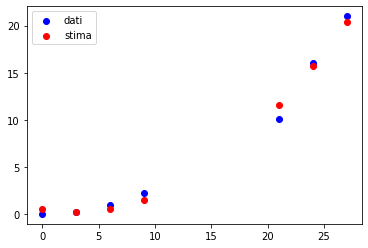

In [11]:
minuto =         np.array([ 0.0, 3.0, 6.0, 9.0, 21.0, 24.0, 27.0])[:,np.newaxis]
distanza_in_km = np.array([ 0, 0.25, 1.0, 2.2, 10.1, 16, 21] )[:,np.newaxis]

# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################
# Usare la funzione polyfit
parabola = np.polyfit(minuto.flatten(), distanza_in_km,2)

# Creiamo le matrici X e y
X = np.concatenate((minuto**2, minuto, minuto**0),1)
y = distanza_in_km

# Risolviamo per la formula del gradiente
parabola_due = np.linalg.pinv(X.T @ X) @ X.T @ y

# Stampiamo "True" se i due metodi trovano gli stessi coefficienti
print(parabola)
print(bool(np.prod((parabola-parabola_due)**2 < 1e-10)))

# Valutiamo il nostro polinomio usando la forma matriciale
y_stimate = X @ parabola

# Visualizziamo dati e polinomio
plt.scatter(minuto, distanza_in_km,c='b')
plt.scatter(minuto, y_stimate, c='r')
plt.legend(('dati','stima'))

# Calcoliamo l'errore MSE
errore = np.sum((distanza_in_km - y_stimate)**2)
print(errore)

**Esercizio 2**: Provate a trovare i coefficienti per un polinomio bivariato (composto da due variabili) che riduca l'errore di ricostruzione rispetto a una semi-sfera. Ovvero, diciamo che vogliamo approssimarlo con un polinomio di grado $2$, l'equazione dovrà avere questa forma:

$z =  \alpha_1 x^2 + \alpha_2 xy + \alpha_3 y^2 + \alpha_4 y + \alpha_5 x + \alpha_6$

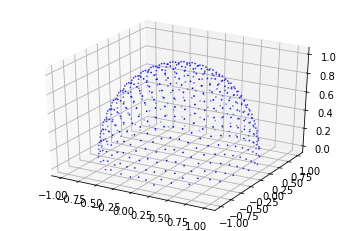

In [12]:
# Funzione di supporto per creare una sfera
def fibonacci_sphere(samples=1000):
    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points

points = fibonacci_sphere()
points = np.asarray(points)

# Seleziono solo la metà superiore della sfera
x = points[:,0][points[:,2]>0]
y = points[:,1][points[:,2]>0]
z = points[:,2][points[:,2]>0]

# Visualizzazione
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z, s=0.5, color='b')

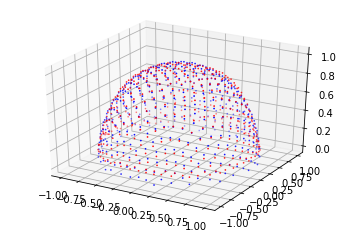

In [13]:
### SCRIVI IL TUO CODICE DA QUI ###
# Creiamo la matrice X
X = x**0
k = 10
for i in np.arange(0,k//2):
  for j in np.arange(0,k//2):
    X = np.vstack((X,x ** i * y ** j))
X=X.T

# L'asse z è la nostra variabile libera
Y = z[:, np.newaxis]

# # Risolviamo per la formula del gradiente
poly = np.linalg.pinv(X.T @ X) @ X.T @ Y

# Calcoliamo le z stimate dal nostro polinomio
z_stimate = X @ poly

# Visualizziamo il risultato
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x,y,z, s=0.5, color='b')
ax.scatter3D(x,y,z_stimate, s=0.5, color='r')

**Esercizio 3**: Provate a trovare i coefficienti per delle sinusoidi che riduca l'errore di ricostruzione di un terreno. Cerchiamo cioè una combinazione lineare del tipo: 

$ z = \alpha_1 sin(x n2\pi) + \alpha_2 sin(y n2\pi) + \alpha_3 cos(x n2\pi) + \alpha_4 cos(y n2\pi) $

con $n$ variabile che modifica la frequenza di oscillazione.

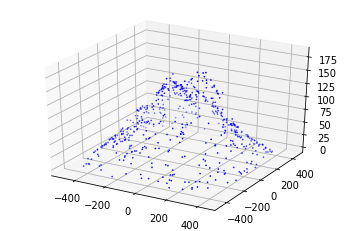

In [14]:
# Carichiamo la point cloud da un file
pcd = o3d.io.read_point_cloud('Mountain.ply')

# Prendiamo solo un sottoinsieme dei punti per rendere
# il calcolo meno oneroso

coords = np.asarray(pcd.points)[0::100,:]
coords = coords

# Eliminiamo la "basetta" del modello 3D
mask = coords[:,1] > 2
x = coords[mask,0]; y = coords[mask,2]; z = coords[mask,1]

# Visualizziamo il terreno
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z, s=0.5, color='b')

In [15]:
### SCRIVI IL TUO CODICE DA QUI ###
# Creiamo la matrice X
#X=np.vstack((x**2,y**2, x, y, x * y, x**0, x**2 * y**2, x**3 * y**3)).T
X = x**0
k = 100
for i in np.arange(0,k):
    X = np.vstack((X,np.sin(x * i * 2 * np.pi)))
    X = np.vstack((X,np.sin(y * i * 2 * np.pi)))
    X = np.vstack((X,np.cos(x * i * 2 * np.pi)))
    X = np.vstack((X,np.cos(y * i * 2 * np.pi)))
X=X.T

# L'asse z è la nostra variabile libera
Y = z[:,np.newaxis]

# # Risolviamo per la formula del gradiente
poly = np.linalg.pinv(X.T @ X) @ X.T @ Y

# Calcoliamo le z stimate dal nostro polinomio
z_stimate = X @ poly

In [16]:
# Visualizzazione risultato
fig = go.Figure(data=[
                      go.Scatter3d(x=x, y=y, z=np.squeeze(z),
                                   mode='markers'),
                      go.Scatter3d(x=x, y=y, z=np.squeeze(z_stimate),
                                   mode='markers')])
fig.show()

# Il gradiente

Per farci un'idea migliore di cosa rappresenti il gradiente, facciamo un esempio visivo sulle immagini. Un'immagine non è altro che un piano 2D discreto, e i colori sono una funzione $f_{bw}: \mathbb{R^2} \rightarrow \mathbb{R}$ se la funzione è in bianco e nero, e $f_{rgb}: \mathbb{R^2} \rightarrow \mathbb{R^3}$ se la funzioneè a colori

. Partiamo da un esempio semplice


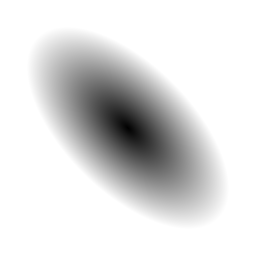

In [17]:
# Con Image.open possiamo leggere l'immagine da un file
image = Image.open('radial_gradient_ellipse_angle45.png')

image

In [18]:
# Possiamo facilmente convertirla in una matrice numpy
pix = np.array(image) / np.max(np.array(image))

print(pix.shape)
print(pix)

(256, 256)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


Notiamo che la sua rappresentazione è quella di una matrice. L'idea è che gli incroci di righe e colonne corrispondano a dei pixel, e in ognuno sia contenuto il valore della funzione in quel punto.

In [19]:
# Numpy ci fornisce una funzione per calcolare il gradiente
# ATTENZIONE: questa funzione prende in input una rappresentazione implicita. 
# Vuole dire che al contrario di funzioni come "scatter", in cui forniamo per ogni
# "x" (dominio) un valore di "y" (immagine), qui forniamo solo i valori dell'immagine
# e la disposizione di questi valori nel dominio è data dalla struttura della
# matrice.
print(pix)
gx, gy = np.gradient(pix)
norm = np.sqrt(gx**2 + gy**2) + 1e-10

# Notiamo che ritorna altre due matrici, della stessa dimensione della iniziale 
print(gx)
print(gx.shape)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(256, 256)


(20, 20)


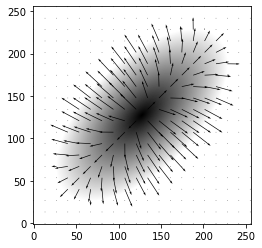

In [20]:
# Visualizziamo il gradiente.

# Creiamo una griglia equidistribuita tra 0 e 255, campionando ogni 20 pixel
x,y = np.meshgrid(np.linspace(0,255,20),np.linspace(0,255,20),indexing='xy')

# Dal nostro gradiente selezioniamo i campioni
# NOTA: meshgrid crea vettori float a due dimensioni, 
#       quindi prima li convertiamo in "int" per renderli indici
#       e poi usiamo "flatten" per renderli vettori unidimensionali
 
g_x_sample = gx[[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
g_y_sample = gy[[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]

print(x.shape)

plt.imshow(pix, cmap='gray',origin='lower')
plt.quiver(x,y,g_x_sample,g_y_sample)
plt.show()

**Esercizio 4**: Provate adesso a:

1) implementare voi la funzione gradiente per una immagine 2D, senza usare una libreria apposita (Può essere relizzato in diversi modi: https://en.wikipedia.org/wiki/Finite_difference )

2) applicarla a una immagine RGB sui tre diversi canali

3) normalizzare i gradienti (siamo cioè interessati solo alla direzione delle frecce e non alla loro lunghezza)

4) visualizzare i tre diversi gradienti 

(256, 256, 3)


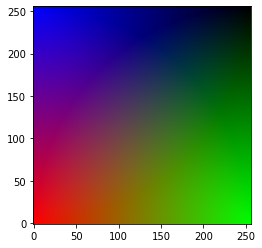

In [21]:
# Qui un esempio di immagine RGB
image = Image.open('corner-gradient-4.png')

# Le immagini possono avere codifiche diverse;
# noi le tratteremo portandole a valori tra 0 e 1
pix = np.array(image) / np.max(np.array(image))

print(pix.shape)
plt.imshow(pix,origin='lower')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



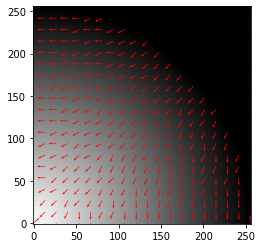

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



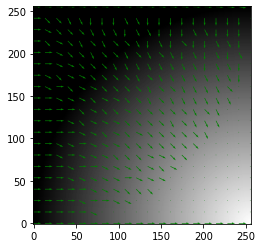

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



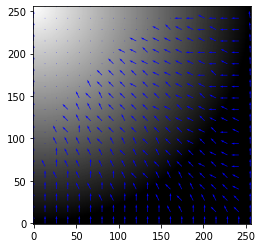

In [22]:
# SCRIVERE QUI SOTTO IL CODICE DELL'ESERCIZIO
################

# Definire una funzione per fare il gradiente discreto. 

def gradiente(grid):
  grad_x = grid.copy() 
  grad_x[:,1:-1] = (grid[:,2:] - grid[:,0:-2]) # usiamo la tecnica del valore centrale
  grad_x[:,-1] = grid[:,-2]                    # ai bordi ci limitamo ad approssimare
  grad_x[:,0] = grid[:,-2]

  grad_y = grid.copy()  
  grad_y[1:-1,:] = (grid[2:,:] - grid[0:-2,])
  grad_y[-1,:] = grid[-2,:]  
  grad_y[0,:] = grid[-2,:]

  return grad_x, grad_y

# Applicarla come fatto prima alla nostra immagine per ognuno dei canali

# == CANALE ROSSO ==
# Normalizziamo i valori contenuti
gx, gy = gradiente(np.array(image)[:,:,0] / np.max(np.array(image)[:,:,0]))

# calcoliamo la norma (aggiungiamo un epsilon per evitare divisioni per 0)
norm = np.sqrt(gx**2 + gy**2) + 1e-10

# Normalizziamo
gx = gx / norm
gy = gy / norm

# Concateniamo i due valori in una sola matrice. La prima codifica il canale Rosso
R_grad = np.dstack((gx,gy))

# == CANALE VERDE ==
gx, gy = gradiente(np.array(image)[:,:,1] / np.max(np.array(image)[:,:,1]))
norm = np.sqrt(gx**2 + gy**2) + 1e-10
gx = gx / norm
gy = gy / norm
G_grad = np.dstack((gx,gy))

# == CANALE BLU ==
gx, gy = gradiente(np.array(image)[:,:,2] / np.max(np.array(image)[:,:,2]))
norm = np.sqrt(gx**2 + gy**2) + 1e-10
gx = gx / norm
gy = gy / norm
B_grad = np.dstack((gx,gy))



# Visualizziamo i risultati
x,y = np.meshgrid(np.linspace(0,pix.shape[0]-1,20),np.linspace(0,pix.shape[1]-1,20),indexing='xy')

g_x_sample = R_grad[:,:,0][[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
g_y_sample = R_grad[:,:,1][[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
plt.imshow(np.array(image)[:,:,0] , cmap='gray', origin='lower')
plt.quiver(x, y, g_x_sample, g_y_sample, color = 'R')
plt.show()

g_x_sample = G_grad[:,:,0][[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
g_y_sample = G_grad[:,:,1][[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
plt.imshow(np.array(image)[:,:,1] , cmap='gray', origin='lower')
plt.quiver(x, y, g_x_sample, g_y_sample, color='G')
plt.show()

g_x_sample = B_grad[:,:,0][[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
g_y_sample = B_grad[:,:,1][[x.astype(np.int32).flatten()],[y.astype(np.int32).flatten()]]
plt.imshow(np.array(image)[:,:,2] , cmap='gray', origin='lower')
plt.quiver(x, y, g_x_sample, g_y_sample,color='B')
plt.show()

**Esercizio 5**: data un'immagine in BW:

1) calcola il gradiente

2) calcola la norma del gradiente

3) visualizza sul 2D l'immagine affianco alla norma per ogni pixel

(500, 500)


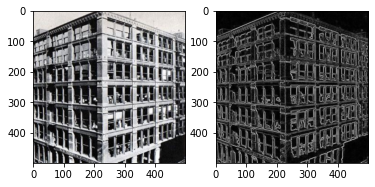

In [23]:
# Qui un esempio di immagine
image = Image.open('building.jpg')
pix = (np.array(image) / np.max(np.array(image)))[:,:,1]
print(pix.shape)

# SVILUPPARE L'ESERCIZIO QUI SOTTO

# Calcolo il gradiente
gx, gy = np.gradient(np.array(image)[:,:,0] / np.max(np.array(image)[:,:,0]))

# Calcolo la norma
norm = np.sqrt(gx**2 + gy**2) + 1e-10

# Visualizzo l'immagine e affianco la norma del gradiente
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(norm, cmap='gray')
